<a href="https://colab.research.google.com/github/sathwikkompalli1/ML-lab/blob/main/AP23110011582_lab8plots.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('placement.csv')

# Rename the categories for the 'placed' column for better plot labels
df['placed'] = df['placed'].astype('category')
df['placed'] = df['placed'].cat.rename_categories({0: 'Not Placed', 1: 'Placed'})

print(df.head())
print(df.info())

   cgpa  placement_exam_marks      placed
0  7.19                  26.0      Placed
1  7.46                  38.0      Placed
2  7.54                  40.0      Placed
3  6.42                   8.0      Placed
4  7.23                  17.0  Not Placed
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   cgpa                  1000 non-null   float64 
 1   placement_exam_marks  1000 non-null   float64 
 2   placed                1000 non-null   category
dtypes: category(1), float64(2)
memory usage: 16.9 KB
None


#This plot shows the sorted values of CGPA. The smooth, increasing line confirms that the CGPA values are continuously distributed.

#Observation
#The average placement exam marks are higher for students who were placed compared to those who were not placed. This suggests that exam performance is a positive predictor of placement

*Bar chart*

/tmp/ipython-input-1792127500.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='placed', data=df, palette='viridis')


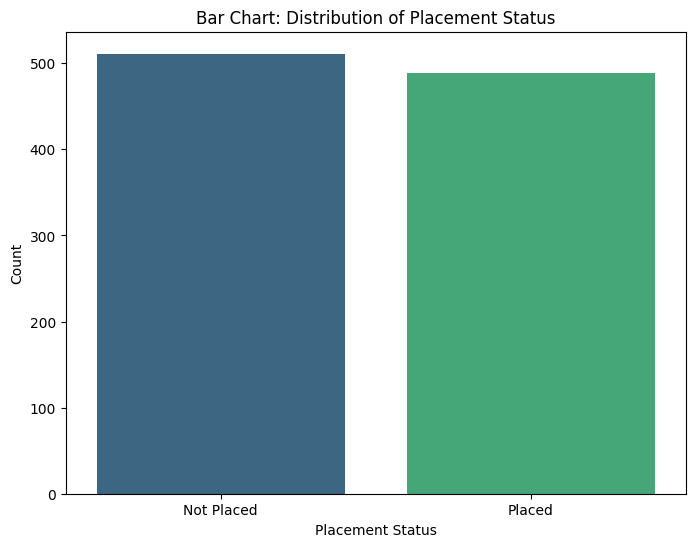

In [33]:
plt.figure(figsize=(8, 6))
sns.countplot(x='placed', data=df, palette='viridis')
plt.title('Bar Chart: Distribution of Placement Status')
plt.xlabel('Placement Status')
plt.ylabel('Count')
plt.show()

#Pie Chart (Placement Proportion)

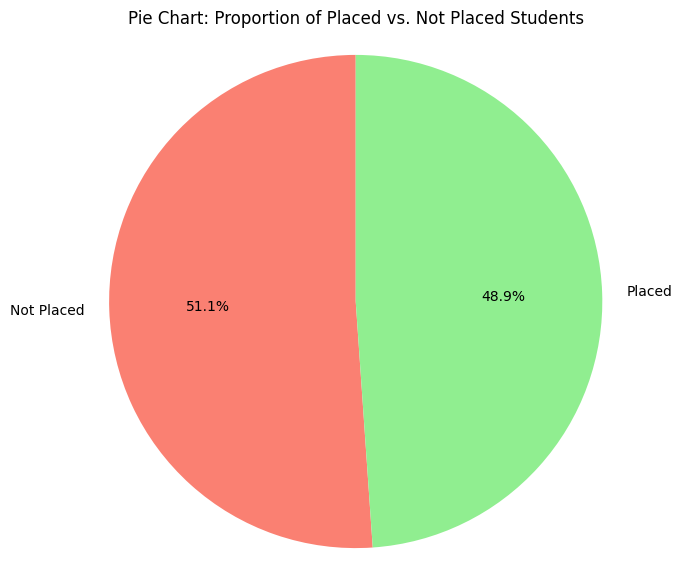

In [21]:
placement_counts = df['placed'].value_counts()

plt.figure(figsize=(7, 7))
plt.pie(
    placement_counts,
    labels=placement_counts.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=['salmon', 'lightgreen']
)
plt.title('Pie Chart: Proportion of Placed vs. Not Placed Students')
plt.axis('equal') # Ensures the pie chart is circular
plt.show() # Use plt.show() in Colab
# plt.savefig('pie_chart_placement.png')

#Observation
#The proportion of students is fairly balanced, with 51.1% Not Placed and 48.9% Placed. This shows the dataset is relatively balanced for classification tasks.

Histogram



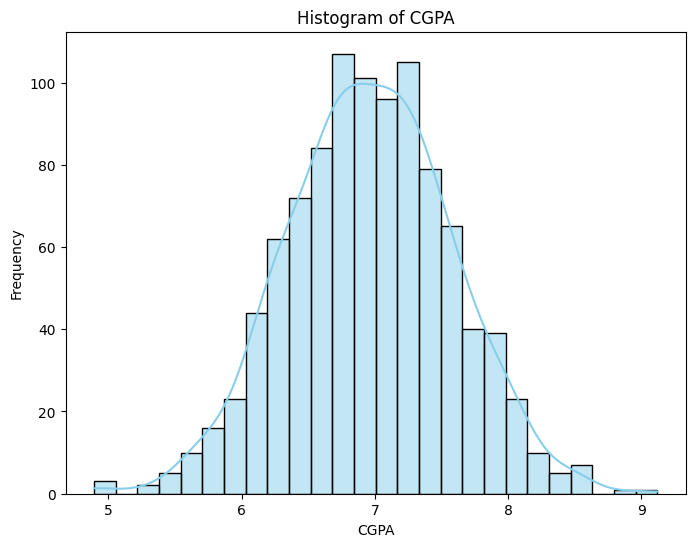

In [34]:
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='cgpa', kde=True, color='skyblue')
plt.title('Histogram of CGPA')
plt.xlabel('CGPA')
plt.ylabel('Frequency')
plt.show()

# Observation

The histogram of CGPA shows a distribution that appears to be approximately normal, centered around a CGPA of 7.0. This suggests that most students have a CGPA in this range, with fewer students having very high or very low CGPA scores.

Boxplot

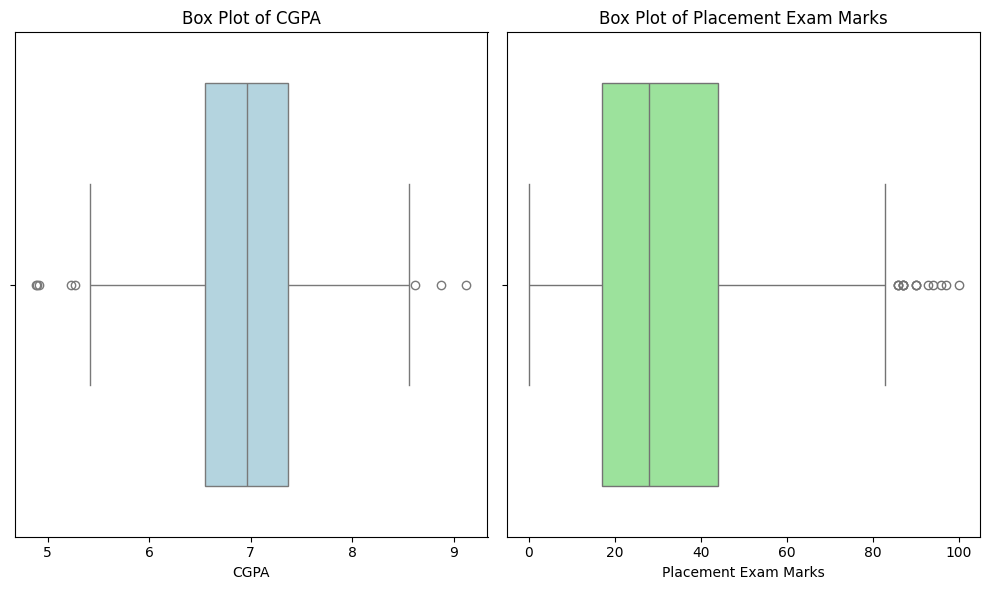

In [35]:
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
sns.boxplot(x='cgpa', data=df, color='lightblue')
plt.title('Box Plot of CGPA')
plt.xlabel('CGPA')

plt.subplot(1, 2, 2)
sns.boxplot(x='placement_exam_marks', data=df, color='lightgreen')
plt.title('Box Plot of Placement Exam Marks')
plt.xlabel('Placement Exam Marks')

plt.tight_layout()
plt.show()

# Observation
The box plots show the distribution of CGPA and Placement Exam Marks. The box plot for CGPA appears relatively symmetrical with a few potential outliers. The box plot for Placement Exam Marks shows a right skew with a significant number of outliers, indicating a wide range of scores and some exceptionally high marks.

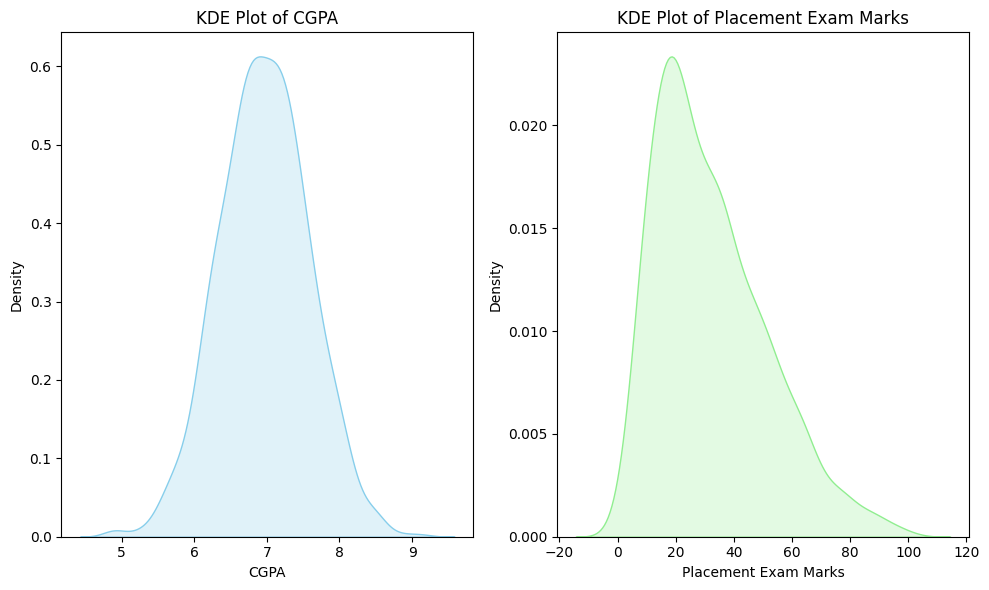

In [36]:
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
sns.kdeplot(data=df, x='cgpa', fill=True, color='skyblue')
plt.title('KDE Plot of CGPA')
plt.xlabel('CGPA')
plt.ylabel('Density')

plt.subplot(1, 2, 2)
sns.kdeplot(data=df, x='placement_exam_marks', fill=True, color='lightgreen')
plt.title('KDE Plot of Placement Exam Marks')
plt.xlabel('Placement Exam Marks')
plt.ylabel('Density')

plt.tight_layout()
plt.show()

# Observation

The KDE plots show the estimated probability density of CGPA and Placement Exam Marks. The CGPA distribution appears roughly bell-shaped, reinforcing the observation from the histogram that it's approximately normal. The Placement Exam Marks distribution is clearly skewed to the right with a peak at lower scores and a long tail extending towards higher values, consistent with the box plot observation of outliers.

Summary:
Based on the univariate and bivariate analysis of the placement.csv dataset, the following key insights were derived:

CGPA as a Primary Predictor (Boxplot & Scatter Plot):

The median CGPA for Placed students (≈7.3) is significantly higher than for Not Placed students (≈6.8).

In the scatter plot, the group of placed students primarily occupies the region of higher CGPA (≥7.0), confirming that academic performance (CGPA) is a strong positive predictor of placement status.

Placement Exam Marks Impact (Bar Chart & Scatter Plot):

The average placement exam marks are higher for placed students, indicating that strong performance in the placement exam contributes to a higher chance of being placed.

However, the scatter plot shows that the highest extreme exam scores (outliers) exist in both groups, suggesting that marks alone are not the sole determinant of placement.

Data Distribution and Balance (Histogram & Pie Chart):

The CGPA variable follows a normal distribution (bell-shaped curve), centered around 7.0.

The dataset is almost perfectly balanced in terms of the target variable, with 48.9% Placed and 51.1% Not Placed. This is ideal for training robust classification models.
